In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [3]:
# Load the dataset
df = pd.read_csv('loan_data.csv')
df.head()

,credit_score,loan_amount,income,employment_length,debt_to_income,loan_status
0,720,39012,54904,5,21.515381,1
1,779,12226,64834,8,38.682835,0
2,667,47927,32332,14,38.574933,1
3,380,23031,29296,13,10.766097,1
4,730,19984,93449,7,11.061158,1


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0] 

Series([], dtype: int64)

C:\Users\GAURAV MISHRA\AppData\Local\Temp\ipykernel_46628\2004674956.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='Set2')


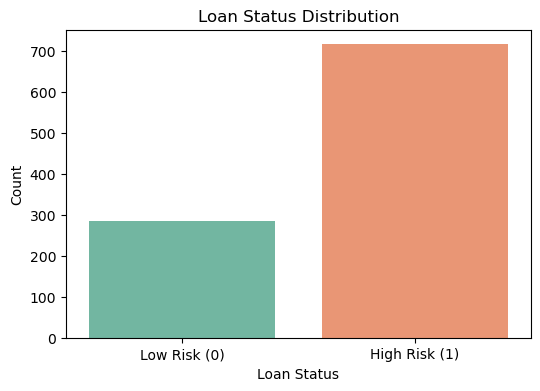

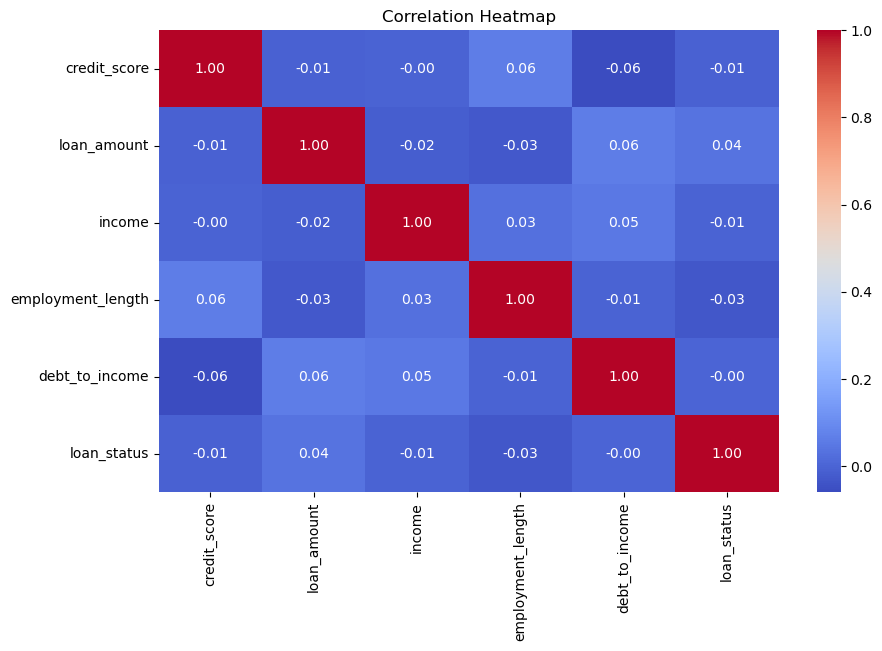

In [7]:
# Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df, palette='Set2')
plt.title('Loan Status Distribution')
plt.xticks([0, 1], ['Low Risk (0)', 'High Risk (1)'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [11]:
# Feature-Target Split
X = df.drop("loan_status", axis=1)  # Features
y = df["loan_status"]               # Target

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [17]:
# Predictions and Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.74
Confusion Matrix:
 [[  0  52]
 [  0 148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.74      1.00      0.85       148

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.55      0.74      0.63       200



C:\Users\GAURAV MISHRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\GAURAV MISHRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\GAURAV MISHRA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
# Predictions and Evaluation
# Class Imbalance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd

y_pred = model.predict(X_test)

# Basic metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Diagnostic information
unique_true = np.unique(y_test)
unique_pred = np.unique(y_pred)
print("\nDiagnostic Information:")
print(f"Classes in y_test: {unique_true}")
print(f"Classes in y_pred: {unique_pred}")
print(f"Missing predictions for classes: {set(unique_true) - set(unique_pred)}")

# Class distribution 
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts().sort_index())
print("\nClass distribution in predictions:")
print(pd.Series(y_pred).value_counts().sort_index())

Accuracy: 0.74
Confusion Matrix:
 [[  0  52]
 [  0 148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.74      1.00      0.85       148

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.55      0.74      0.63       200


Diagnostic Information:
Classes in y_test: [0 1]
Classes in y_pred: [1]
Missing predictions for classes: {0}

Class distribution in test set:
loan_status
0     52
1    148
Name: count, dtype: int64

Class distribution in predictions:
1    200
Name: count, dtype: int64


In [23]:
# Retry Logistic Regression with class_weight='balanced' to handle class imbalance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Re-train the model with balanced class weights
balanced_model = LogisticRegression(class_weight='balanced')
balanced_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_balanced = balanced_model.predict(X_test)

# Evaluation
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
class_report_balanced = classification_report(y_test, y_pred_balanced)

accuracy_balanced, conf_matrix_balanced, class_report_balanced


(0.49,
 array([[24, 28],
        [74, 74]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.24      0.46      0.32        52\n           1       0.73      0.50      0.59       148\n\n    accuracy                           0.49       200\n   macro avg       0.49      0.48      0.46       200\nweighted avg       0.60      0.49      0.52       200\n')

In [27]:
# Train a Random Forest Classifier and evaluate
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, conf_matrix_rf, class_report_rf


(0.72,
 array([[  4,  48],
        [  8, 140]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.33      0.08      0.12        52\n           1       0.74      0.95      0.83       148\n\n    accuracy                           0.72       200\n   macro avg       0.54      0.51      0.48       200\nweighted avg       0.64      0.72      0.65       200\n')